# Problem Statement:
Fashion MNIST is a dataset comprising 60,000 training images and 10,000 testing images, each depicting various fashion items in a 28x28 grayscale format.The dataset encompasses ten distinct categories of apparel. The primary aim of this assignment is to develop a fully connected neural network (FCNN) that can accurately classify these images into the correct fashion categories.


# Objectives:


### Data Visualization and Preprocessing:
● Visualize the distribution of different fashion items in the dataset to understand the data better.

● Normalize the image pixel values for effective model training.

● Convert the categorical labels into a one-hot encoded format to suit the neural network’s output layer

### Model Architecture and Development:
● Design a fully connected neural network with appropriate input, hidden,and output layers.

● Ensure the model is complex enough to capture the underlying patterns in the data without overfitting.

### Model Training:
● Train the model on the preprocessed training data, using categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and accuracy as the evaluation metric.

● Utilize a validation split to monitor the model’s performance on unseen data during training.

### Performance Evaluation:
● Assess the model’s performance using both training and validation datasets.

● Visualize the training and validation loss and accuracy to identify any signs of overfitting or underfitting.

# 1. Load Important Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD


import warnings
warnings.filterwarnings("ignore")

C:\Users\raman\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# 2. Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Load Fashion MNIST from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# 3. Data Visualization 

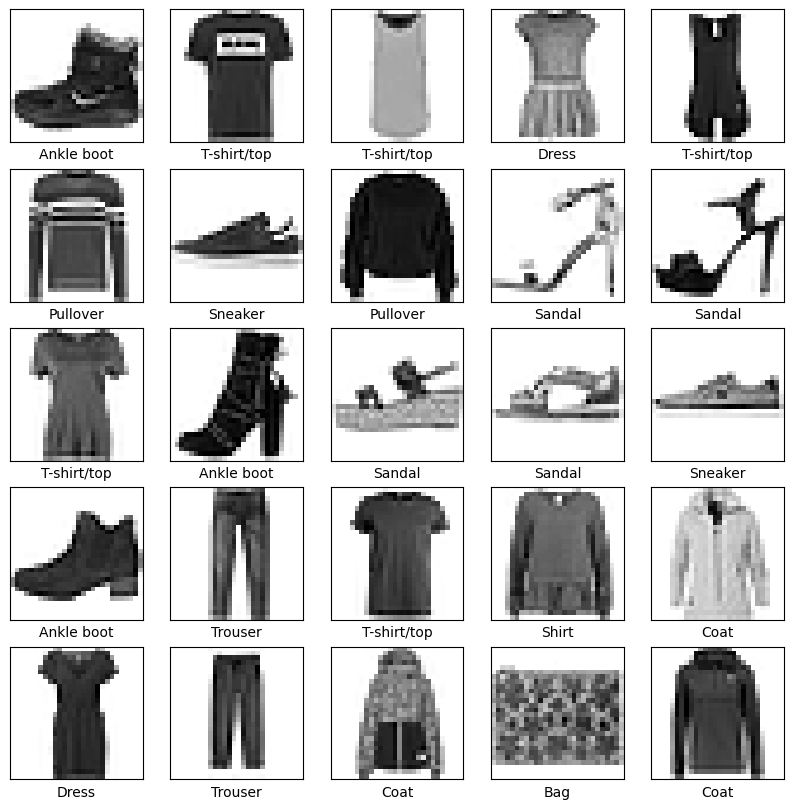

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(x_train[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[y_train[i]]) 
plt.show()

# 4. Class Distribution

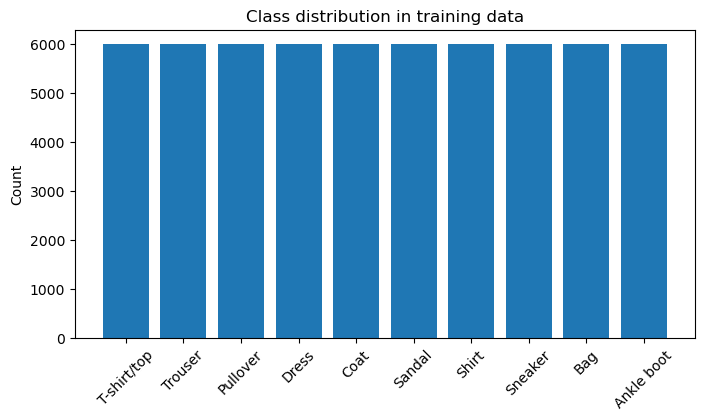

{'T-shirt/top': 6000, 'Trouser': 6000, 'Pullover': 6000, 'Dress': 6000, 'Coat': 6000, 'Sandal': 6000, 'Shirt': 6000, 'Sneaker': 6000, 'Bag': 6000, 'Ankle boot': 6000}


In [5]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 4))
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Class distribution in training data")
plt.show()

print(dict(zip(class_names, counts)))

# 5. Normalize Image Pixel Values

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# 6. One‑hot encode labels for 10 classes (0–9)

In [7]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("Encoded label shape:", y_train_encoded.shape)

Encoded label shape: (60000, 10)


# 7. Hyperparameter Tuning

Lest try test and compare different learning_rates , batch_size and epochs to fetch the best combination for the model

In [8]:
def build_model(learning_rate):
    model = Sequential([
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])
    
    optimizer = SGD(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [9]:
learning_rates = [0.05, 0.01, 0.001]
batch_sizes = [128, 64, 32]
epochs_list = [20, 10]

In [10]:
# Encode ONLY if labels are not already one-hot
if len(y_train.shape) == 1:
    y_train_oh = to_categorical(y_train, 10)
    y_test_oh = to_categorical(y_test, 10)
else:
    y_train_oh = y_train
    y_test_oh = y_test

In [11]:
results = []

for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epochs_list:

            print(f"Training with LR={lr}, Batch={batch}, Epochs={epochs}")

            model = build_model(lr)

            model.fit(
                x_train,
                y_train_oh,
                epochs=epochs,
                batch_size=batch,
                verbose=0
            )

            _, test_acc = model.evaluate(
                x_test,
                y_test_oh,
                verbose=0
            )

            results.append({
                "learning_rate": lr,
                "batch_size": batch,
                "epochs": epochs,
                "test_accuracy": test_acc
            })

Training with LR=0.05, Batch=128, Epochs=20
Training with LR=0.05, Batch=128, Epochs=10
Training with LR=0.05, Batch=64, Epochs=20
Training with LR=0.05, Batch=64, Epochs=10
Training with LR=0.05, Batch=32, Epochs=20
Training with LR=0.05, Batch=32, Epochs=10
Training with LR=0.01, Batch=128, Epochs=20
Training with LR=0.01, Batch=128, Epochs=10
Training with LR=0.01, Batch=64, Epochs=20
Training with LR=0.01, Batch=64, Epochs=10
Training with LR=0.01, Batch=32, Epochs=20
Training with LR=0.01, Batch=32, Epochs=10
Training with LR=0.001, Batch=128, Epochs=20
Training with LR=0.001, Batch=128, Epochs=10
Training with LR=0.001, Batch=64, Epochs=20
Training with LR=0.001, Batch=64, Epochs=10
Training with LR=0.001, Batch=32, Epochs=20
Training with LR=0.001, Batch=32, Epochs=10


In [12]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by="test_accuracy", ascending=False)

,learning_rate,batch_size,epochs,test_accuracy
4,0.050,32,20,0.8859
5,0.050,32,10,0.8779
0,0.050,128,20,0.8758
10,0.010,32,20,0.8757
2,0.050,64,20,0.8694
1,0.050,128,10,0.8686
11,0.010,32,10,0.8643
8,0.010,64,20,0.8582
3,0.050,64,10,0.8570
6,0.010,128,20,0.8561


In the hyperparameter experiments, the setup with a learning rate of 0.05, batch size 32, and 20 epochs gave the best test accuracy at about 88.59%. For the final model, however, a configuration with a learning rate of 0.05, batch size 128, and 20 epochs was chosen. Although this setup yields a slightly lower test accuracy (~87.58%), it provides more stable training due to larger batch updates, reducing sensitivity to stochastic noise and improving training consistency.

# 8. Build the Fully Connected Neural Network

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 9. Model Compilation

In [14]:
model.compile(
    optimizer=SGD(learning_rate=0.05),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# 10. Training

In [16]:
history = model.fit(x_train, y_train_encoded, epochs=20, batch_size=128,validation_split=0.2, verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7448 - loss: 0.7576 - val_accuracy: 0.8037 - val_loss: 0.5640
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8223 - loss: 0.5072 - val_accuracy: 0.8389 - val_loss: 0.4632
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8412 - loss: 0.4528 - val_accuracy: 0.8324 - val_loss: 0.4703
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8500 - loss: 0.4234 - val_accuracy: 0.8354 - val_loss: 0.4576
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8580 - loss: 0.4020 - val_accuracy: 0.8531 - val_loss: 0.4089
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8632 - loss: 0.3841 - val_accuracy: 0.8573 - val_loss: 0.3975
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8677 - loss: 0.3706 - val_accuracy: 0.8613 - val_loss: 0.3905
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8729 - loss: 0.3568 - val_accuracy: 0

# 11. Evaluation

In [18]:
train_loss, train_acc = model.evaluate(x_train, y_train_encoded, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test_encoded, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8915
Test Accuracy: 0.8656


# 12. Plot Training & Validation Curves

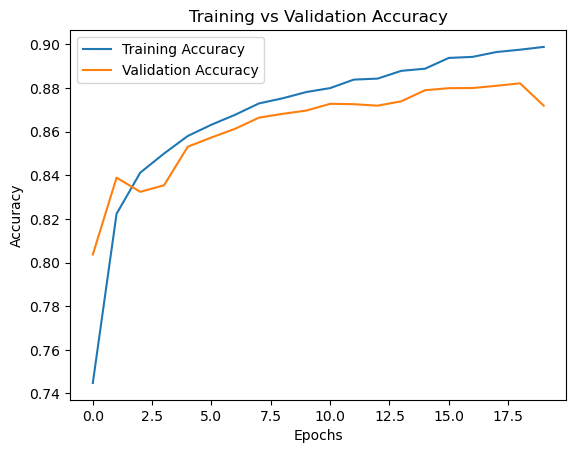

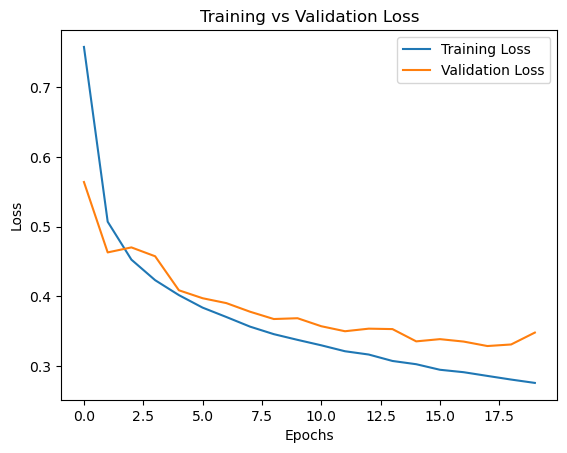

In [19]:
# Plot Training & Validation Accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()






# Plot Training & Validation Loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()